## Credit Risk Management

## Overview
In this project you will have to put yourself in the shoes of a loan issuer and manage credit risk by using the past data and deciding whom to give the loan to in the future. The text files contain complete loan data for all loans issued by XYZ Corp. through 2007-2015. The data contains the indicator of default, payment information, credit history, etc.
The data should be divided into train (June 2007 - May 2015) and out-of-time test (June 2015 - Dec 2015) data. You will have use the training data to build models/analytical solution and finally apply it to test data to measure the performance and robustness of the models. 
You should use the variable : 'issue_d' to divide the data in the above time periods, the variable is in <month>-<year> format.


## 1. Importing Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

## 2. Load the data

In [2]:

df = pd.read_csv('XYZCorp_LendingData.txt' , delimiter = '\t',  low_memory = False)

##  3. Data Preparation
The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. Here we first analyze the data statistically and then split the target varibles and normalize, followed by splitting the dataframe into numerical and categorical features.

In [3]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
df.shape

(855969, 73)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

## 3.1 Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables and count, unique, top, freq for categorical variables.

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


In [7]:
# dataframe with numerical features
df.describe(include=['int64'])

,id,member_id,default_ind
count,8.559690e+05,8.559690e+05,855969.000000
mean,3.224073e+07,3.476269e+07,0.054286
std,2.271969e+07,2.399418e+07,0.226581
min,5.473400e+04,7.069900e+04,0.000000
25%,9.067986e+06,1.079273e+07,0.000000
50%,3.431355e+07,3.697532e+07,0.000000
75%,5.446311e+07,5.803559e+07,0.000000
max,6.861687e+07,7.351969e+07,1.000000


In [8]:
# dataframe with categorical features
df.describe(include=['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,...,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,855969,855969,855969,806526,812908,855969,855969,855969,855969,121812,...,855936,855969,855969,855969,855969,847107,602998,855919,855969,442
unique,2,7,35,290912,11,6,3,103,2,120335,...,60991,931,51,697,2,97,3,102,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,n,,...,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,600221,247998,54958,12965,282090,429106,318178,48212,855964,231,...,398089,9466,125172,6433,442555,467510,534094,701687,855527,252


In [9]:
df.describe(include=['float64'])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,...,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000
mean,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,...,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963
std,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,...,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049
min,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,...,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,...,24959.500000,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000
75%,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,1.000000,50.000000,...,47493.000000,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,8.000000,188.000000,...,634217.000000,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000


## 4. Exploratory Data Analysis

## 4.1 Missing Data Analysis


In [10]:
df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [11]:
null_in_df = df.isnull().sum()/len(df)
null_in_df

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.057763
emp_length                     0.050307
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
pymnt_plan                     0.000000
desc                           0.857691
purpose                        0.000000
title                          0.000039
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000


In [12]:
df.shape

(855969, 73)

In [13]:
total = df.isnull().sum().sort_values(ascending=False)
total

dti_joint                      855529
verification_status_joint      855527
annual_inc_joint               855527
il_util                        844360
mths_since_rcnt_il             843035
total_bal_il                   842681
inq_last_12m                   842681
open_acc_6m                    842681
open_il_6m                     842681
open_il_24m                    842681
open_il_12m                    842681
open_rv_12m                    842681
open_rv_24m                    842681
max_bal_bc                     842681
all_util                       842681
inq_fi                         842681
total_cu_tl                    842681
desc                           734157
mths_since_last_record         724785
mths_since_last_major_derog    642830
mths_since_last_delinq         439812
next_pymnt_d                   252971
tot_cur_bal                     67313
tot_coll_amt                    67313
total_rev_hi_lim                67313
emp_title                       49443
emp_length  

In [14]:
percent = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100
percent

dti_joint                      99.948596
verification_status_joint      99.948363
annual_inc_joint               99.948363
il_util                        98.643759
mths_since_rcnt_il             98.488964
total_bal_il                   98.447607
inq_last_12m                   98.447607
open_acc_6m                    98.447607
open_il_6m                     98.447607
open_il_24m                    98.447607
open_il_12m                    98.447607
open_rv_12m                    98.447607
open_rv_24m                    98.447607
max_bal_bc                     98.447607
all_util                       98.447607
inq_fi                         98.447607
total_cu_tl                    98.447607
desc                           85.769111
mths_since_last_record         84.674211
mths_since_last_major_derog    75.099682
mths_since_last_delinq         51.381767
next_pymnt_d                   29.553757
tot_cur_bal                     7.863953
tot_coll_amt                    7.863953
total_rev_hi_lim

In [15]:
missingdata = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missingdata.head(32)

,Total,Percent
dti_joint,855529,99.948596
verification_status_joint,855527,99.948363
annual_inc_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
total_bal_il,842681,98.447607
inq_last_12m,842681,98.447607
open_acc_6m,842681,98.447607
open_il_6m,842681,98.447607
open_il_24m,842681,98.447607


## 4.2 Handling Missing values

In [16]:
nullpercent = null_in_df[null_in_df>0.15].index

In [17]:
nullpercent

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [18]:
df.drop(nullpercent, axis=1, inplace=True)

In [19]:
df.shape

(855969, 51)

In [20]:
## We have dropped 22 varibles
df.isnull().sum().sort_values(ascending = False)

tot_cur_bal                   67313
tot_coll_amt                  67313
total_rev_hi_lim              67313
emp_title                     49443
emp_length                    43061
last_pymnt_d                   8862
revol_util                      446
collections_12_mths_ex_med       56
last_credit_pull_d               50
title                            33
issue_d                           0
annual_inc                        0
verification_status               0
default_ind                       0
pymnt_plan                        0
home_ownership                    0
zip_code                          0
purpose                           0
grade                             0
sub_grade                         0
dti                               0
installment                       0
int_rate                          0
term                              0
funded_amnt_inv                   0
funded_amnt                       0
loan_amnt                         0
member_id                   

## Imputation

In [21]:
#For Numerical Data using Mean
df['tot_cur_bal'] = df['tot_cur_bal'].fillna((df['tot_cur_bal'].mean()))
df['tot_coll_amt'] = df['tot_coll_amt'].fillna((df['tot_coll_amt'].mean()))
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna((df['total_rev_hi_lim'].mean()))
df['revol_util'] = df['revol_util'].fillna((df['revol_util'].mean()))
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna((df['collections_12_mths_ex_med'].mean()))


In [22]:
#For Categorical Data using Mode
df['emp_title'] = df['emp_title'].fillna(('Teacher'))
df['emp_length'] = df['emp_length'].fillna(('10+ years'))
df['title'] = df['title'].fillna(('Debt consolidation'))
df['last_pymnt_d'] = df['last_pymnt_d'].fillna(('Jan-2016'))
df['last_credit_pull_d'] = df['last_credit_pull_d'].fillna(('Jan-2016'))

In [23]:
df.isnull().sum().sort_values(ascending = False)

default_ind                   0
home_ownership                0
delinq_2yrs                   0
dti                           0
addr_state                    0
zip_code                      0
title                         0
purpose                       0
pymnt_plan                    0
issue_d                       0
verification_status           0
annual_inc                    0
emp_length                    0
inq_last_6mths                0
emp_title                     0
sub_grade                     0
grade                         0
installment                   0
int_rate                      0
term                          0
funded_amnt_inv               0
funded_amnt                   0
loan_amnt                     0
member_id                     0
earliest_cr_line              0
open_acc                      0
total_rev_hi_lim              0
recoveries                    0
tot_cur_bal                   0
tot_coll_amt                  0
acc_now_delinq                0
applicat

## 5. Splitting,Feature Engineering and Removing Outliers

In [24]:
print(df.describe(include=['object']))

              term   grade sub_grade emp_title emp_length home_ownership  \
count       855969  855969    855969    855969     855969         855969   
unique           2       7        35    290912         11              6   
top      36 months       B        B3   Teacher  10+ years       MORTGAGE   
freq        600221  247998     54958     62408     325151         429106   

       verification_status   issue_d pymnt_plan             purpose  \
count               855969    855969     855969              855969   
unique                   3       103          2                  14   
top        Source Verified  Oct-2015          n  debt_consolidation   
freq                318178     48212     855964              505392   

                     title zip_code addr_state earliest_cr_line  \
count               855969   855969     855969           855969   
unique               60991      931         51              697   
top     Debt consolidation    945xx         CA         Aug-200

In [25]:
print(df.describe(include=['float64']))

           loan_amnt    funded_amnt  funded_amnt_inv       int_rate  \
count  855969.000000  855969.000000    855969.000000  855969.000000   
mean    14745.571335   14732.378305     14700.061226      13.192320   
std      8425.340005    8419.471653      8425.805478       4.368365   
min       500.000000     500.000000         0.000000       5.320000   
25%      8000.000000    8000.000000      8000.000000       9.990000   
50%     13000.000000   13000.000000     13000.000000      12.990000   
75%     20000.000000   20000.000000     20000.000000      15.990000   
max     35000.000000   35000.000000     35000.000000      28.990000   

         installment    annual_inc            dti    delinq_2yrs  \
count  855969.000000  8.559690e+05  855969.000000  855969.000000   
mean      436.238072  7.507119e+04      18.122165       0.311621   
std       243.726876  6.426447e+04      17.423629       0.857189   
min        15.690000  0.000000e+00       0.000000       0.000000   
25%       260.550000

In [26]:
#converting quantitative to object
df['inq_last_6mths'] = df['inq_last_6mths'].astype('object')
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].astype('object')
df['acc_now_delinq'] = df['acc_now_delinq'].astype('object')
df['open_acc'] = df['open_acc'].astype('object')
df['policy_code'] = df['policy_code'].astype('object')
df['pub_rec'] = df['pub_rec'].astype('object')
df['delinq_2yrs'] = df['delinq_2yrs'].astype('object')

In [27]:
#'last_pymnt_d' and 'last_credit_pull_d' date should not be considered for dummies(either we can drop from the current dataframe or we can covert it into date)
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
#'issue_d'(Issue date) is used for splitting into train and test
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [28]:
df.shape

(855969, 51)

# 5.1 Feature Engineering

In [29]:
df['default_ind'] = df['default_ind'].astype(str)

In [30]:
df.drop(['id','member_id','emp_title','title','sub_grade','zip_code'], axis = 1, inplace = True)
#'id' and 'member_id' are unique identifiers
#2.9 Lakh different categories for 'emp_title' and 'title'
#'sub_grade' can be removed because there is grade.
#zip code also has many categories

In [31]:
df = df.drop(["earliest_cr_line"], axis =1)   #value_counts>697 +getdummies wont support
df = df.drop(["last_pymnt_d"], axis =1)       #value_counts>100 +imbalanced +affecting desc
df = df.drop(["last_credit_pull_d"], axis =1) #value_counts>100 +imbalanced

In [32]:
df.shape

(855969, 42)

In [33]:
df['total_acc'].value_counts()

22.0     31159
20.0     30955
21.0     30917
19.0     30545
23.0     30213
18.0     30031
24.0     29986
17.0     29671
25.0     28660
16.0     28143
26.0     28049
15.0     26907
27.0     26683
14.0     25390
28.0     25243
29.0     24226
13.0     23828
30.0     23012
12.0     21341
31.0     21286
32.0     20198
11.0     19216
33.0     18462
34.0     17301
10.0     16760
35.0     15916
36.0     14662
9.0      14138
37.0     13598
38.0     12141
         ...  
113.0        3
100.0        3
116.0        3
104.0        2
107.0        2
109.0        2
112.0        1
138.0        1
137.0        1
125.0        1
135.0        1
156.0        1
126.0        1
130.0        1
129.0        1
103.0        1
140.0        1
150.0        1
146.0        1
121.0        1
114.0        1
151.0        1
119.0        1
118.0        1
162.0        1
108.0        1
111.0        1
169.0        1
117.0        1
127.0        1
Name: total_acc, Length: 134, dtype: int64

# 5.2 Split Dataframe into numeric and categorical
Split dataframe into 2 with:

* categorical features
* numerical features

In [34]:
df.columns.values

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'], dtype=object)

In [35]:
#Quantitative variables
#for col in data.columns.values give 'col'

quantitative_columns = [col for col in df.columns.values if df[col].dtype == 'float64']
df_num = df[quantitative_columns]
df_num.head()

#it takes variables which have datatype 'float64' and 'int64'

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_bal,revol_util,total_acc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,13648.0,83.7,9.0,...,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,225.412882,139766.247529,32163.574526
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,1687.0,9.4,4.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,225.412882,139766.247529,32163.574526
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,2956.0,98.5,10.0,...,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,225.412882,139766.247529,32163.574526
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,5598.0,21.0,37.0,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,225.412882,139766.247529,32163.574526
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,27783.0,53.9,38.0,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,225.412882,139766.247529,32163.574526


In [36]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 23 columns):
loan_amnt                  855969 non-null float64
funded_amnt                855969 non-null float64
funded_amnt_inv            855969 non-null float64
int_rate                   855969 non-null float64
installment                855969 non-null float64
annual_inc                 855969 non-null float64
dti                        855969 non-null float64
revol_bal                  855969 non-null float64
revol_util                 855969 non-null float64
total_acc                  855969 non-null float64
out_prncp                  855969 non-null float64
out_prncp_inv              855969 non-null float64
total_pymnt                855969 non-null float64
total_pymnt_inv            855969 non-null float64
total_rec_prncp            855969 non-null float64
total_rec_int              855969 non-null float64
total_rec_late_fee         855969 non-null float64
recoveries            

In [37]:
df['last_pymnt_amnt'].value_counts() ##Checking whether acceptable as a categorical variable

0.00        8867
327.34      2053
318.79      1767
312.86      1437
392.81      1374
491.01      1360
314.20      1312
382.55      1272
322.63      1253
478.19      1211
654.68      1194
375.43      1139
163.67      1106
329.91      1101
261.88      1089
469.29      1058
333.53      1058
196.41      1054
387.15      1000
637.58       989
377.04       983
625.72       963
335.45       961
159.40       958
483.94       930
336.90       920
255.04       919
191.28       881
471.30       874
880.61       864
            ... 
11740.40       1
5469.53        1
4301.36        1
31217.01       1
7199.39        1
657.22         1
6443.85        1
768.55         1
11741.15       1
18449.78       1
11751.10       1
5050.00        1
9777.43        1
16156.58       1
3572.71        1
16163.17       1
16156.83       1
18450.78       1
10512.52       1
1610.65        1
1605.35        1
17202.94       1
12354.76       1
24691.29       1
5443.72        1
11745.35       1
10513.52       1
30.49         

In [38]:
# save all categorical columns in list
categorical_columns = [col for col in df.columns.values if df[col].dtype == 'object'] ## object means categorical variable
## Here we are selecting all columns an then putting the categorical column in Categorical_columns

In [39]:
categorical_columns

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'default_ind']

In [40]:
df_cat = df[categorical_columns]
df_cat

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind
0,36 months,B,10+ years,RENT,Verified,n,credit_card,AZ,0,1,3,0,f,0,1,INDIVIDUAL,0,0
1,60 months,C,< 1 year,RENT,Source Verified,n,car,GA,0,5,3,0,f,0,1,INDIVIDUAL,0,1
2,36 months,C,10+ years,RENT,Not Verified,n,small_business,IL,0,2,2,0,f,0,1,INDIVIDUAL,0,0
3,36 months,C,10+ years,RENT,Source Verified,n,other,CA,0,1,10,0,f,0,1,INDIVIDUAL,0,0
4,60 months,B,1 year,RENT,Source Verified,n,other,OR,0,0,15,0,f,0,1,INDIVIDUAL,0,0
5,36 months,A,3 years,RENT,Source Verified,n,wedding,AZ,0,3,9,0,f,0,1,INDIVIDUAL,0,0
6,60 months,C,8 years,RENT,Not Verified,n,debt_consolidation,NC,0,1,7,0,f,0,1,INDIVIDUAL,0,0
7,36 months,E,9 years,RENT,Source Verified,n,car,CA,0,2,4,0,f,0,1,INDIVIDUAL,0,0
8,60 months,F,4 years,OWN,Source Verified,n,small_business,CA,0,2,11,0,f,0,1,INDIVIDUAL,0,1
9,60 months,B,< 1 year,RENT,Verified,n,other,TX,0,0,2,0,f,0,1,INDIVIDUAL,0,1


In [41]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 18 columns):
term                          855969 non-null object
grade                         855969 non-null object
emp_length                    855969 non-null object
home_ownership                855969 non-null object
verification_status           855969 non-null object
pymnt_plan                    855969 non-null object
purpose                       855969 non-null object
addr_state                    855969 non-null object
delinq_2yrs                   855969 non-null object
inq_last_6mths                855969 non-null object
open_acc                      855969 non-null object
pub_rec                       855969 non-null object
initial_list_status           855969 non-null object
collections_12_mths_ex_med    855969 non-null object
policy_code                   855969 non-null object
application_type              855969 non-null object
acc_now_delinq                855969 non-

In [42]:
df_cat.drop(['default_ind'], axis=1, inplace=True)

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
#'addr_state' shouldnot be considered for dummies because it has 50 categories 
df_cat.drop(['addr_state'], axis=1, inplace=True)

In [44]:
df_cat.shape

(855969, 16)

In [45]:
data_cat_dummies = pd.get_dummies(df_cat,drop_first=True)
data_cat_dummies.head()

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,...,collections_12_mths_ex_med_16.0,collections_12_mths_ex_med_20.0,application_type_JOINT,acc_now_delinq_1.0,acc_now_delinq_2.0,acc_now_delinq_3.0,acc_now_delinq_4.0,acc_now_delinq_5.0,acc_now_delinq_6.0,acc_now_delinq_14.0
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5.3 Boxplot and Scaling

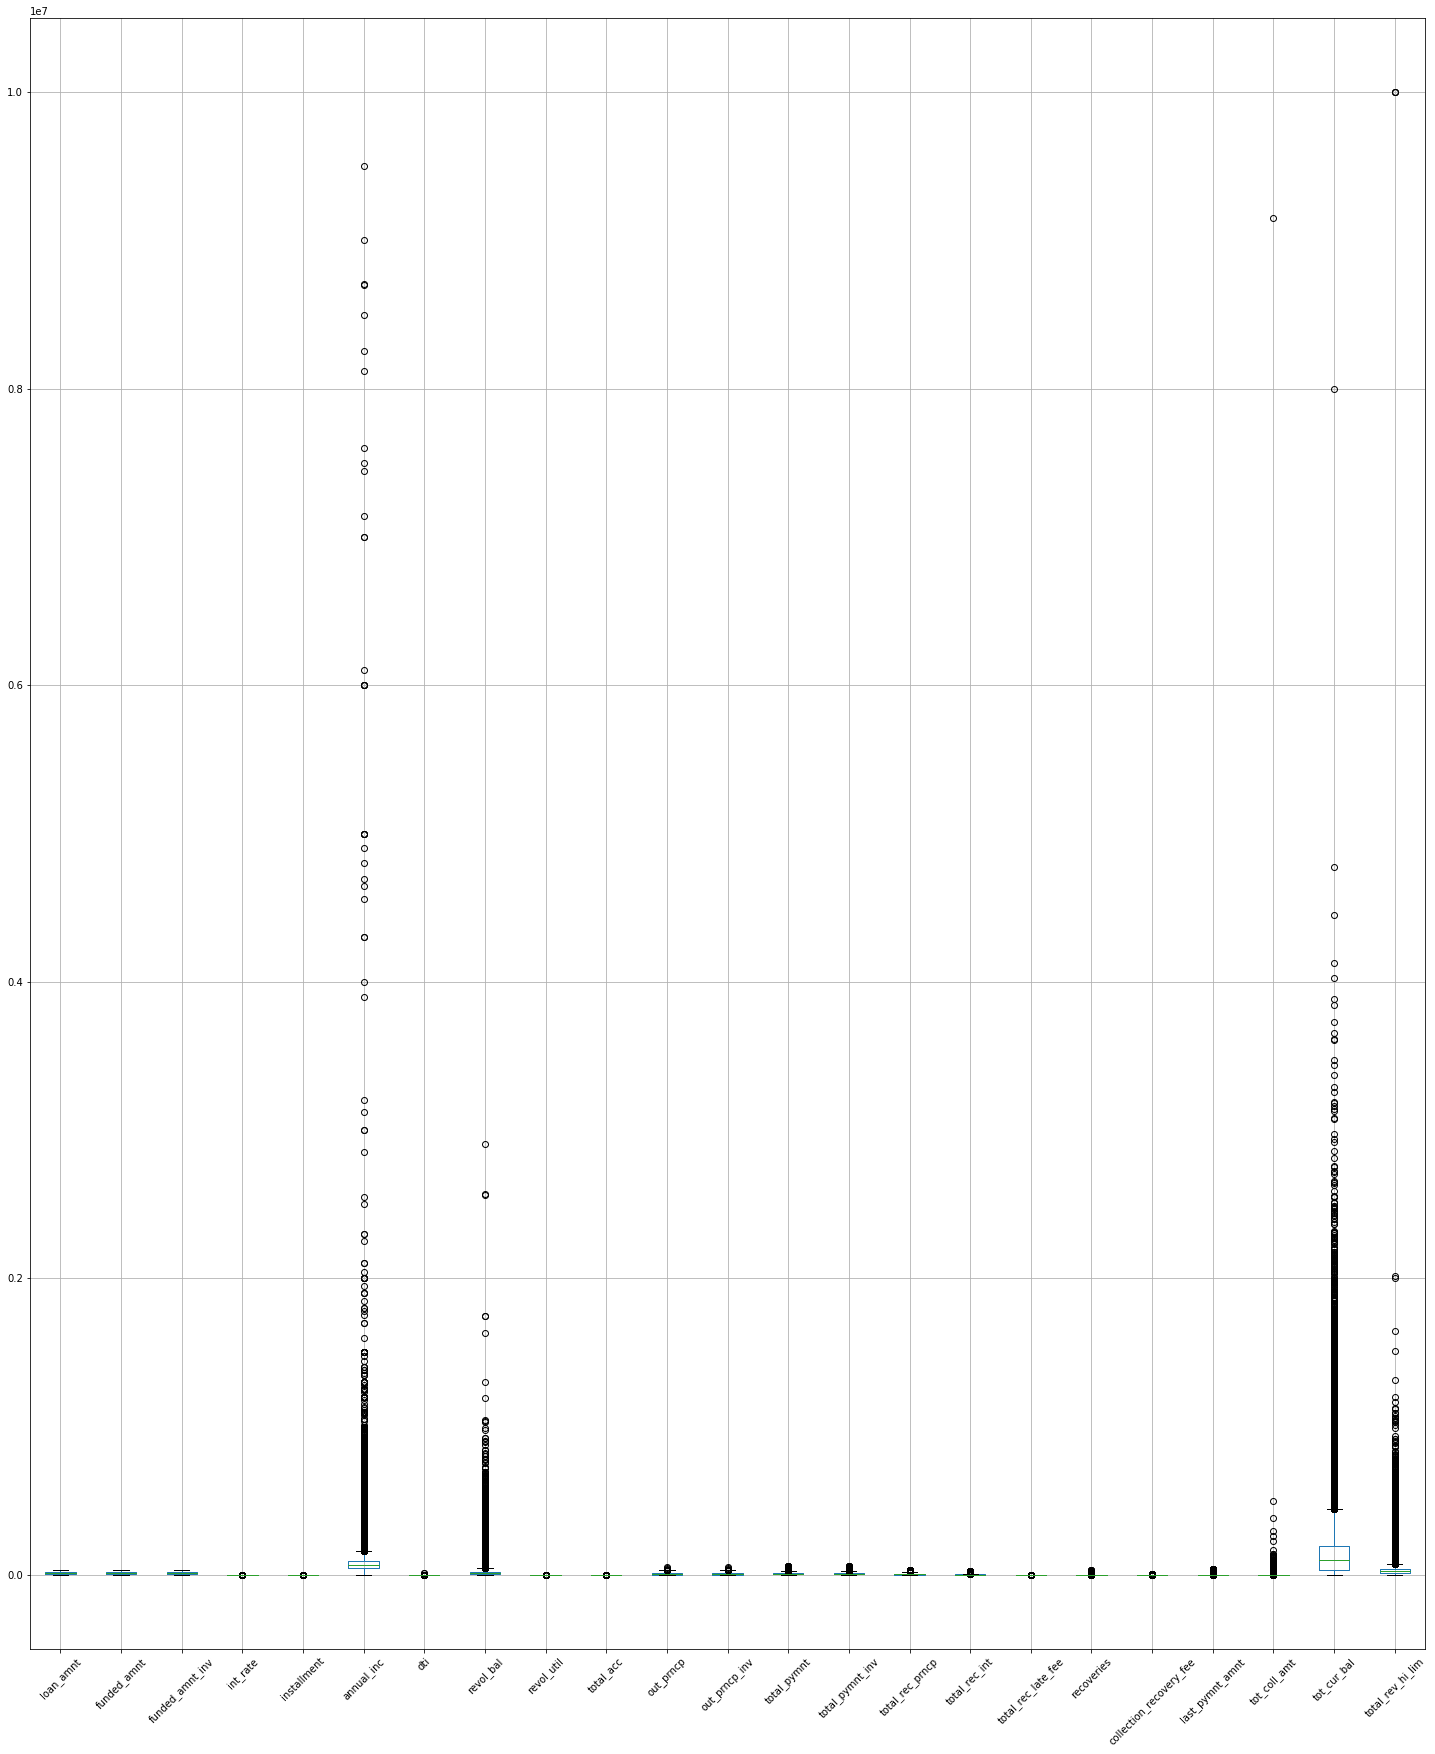

In [46]:
df_num.boxplot(figsize=(25,30),rot=45)

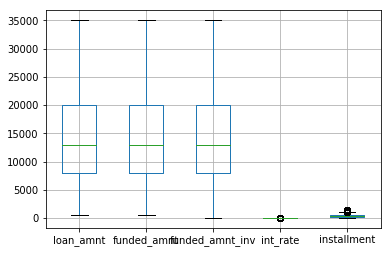

In [47]:
BP1=df_num.boxplot(column=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment']) ## No outliers

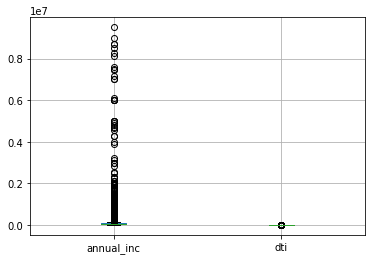

In [48]:
BP2=df_num.boxplot(column=['annual_inc','dti'])

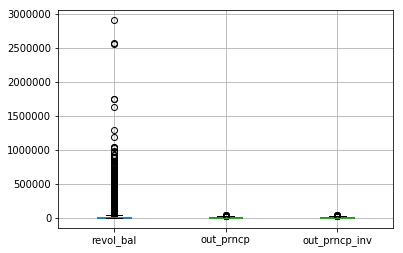

In [49]:
BP3=df_num.boxplot(column=['revol_bal','out_prncp','out_prncp_inv'])

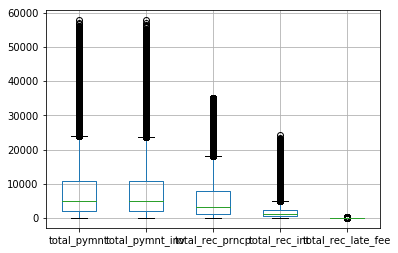

In [50]:
BP4=df_num.boxplot(column=['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee'])

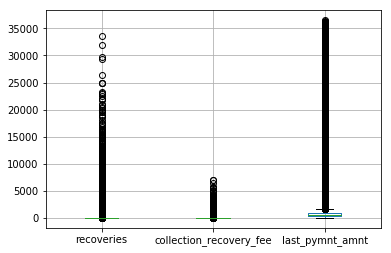

In [51]:
BP5=df_num.boxplot(column=['recoveries','collection_recovery_fee','last_pymnt_amnt'])

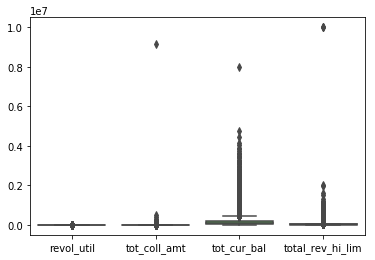

In [52]:
BP6=sns.boxplot(data=df_num[['revol_util','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']],orient="v",palette="Set1")

## Scaling

In [53]:
from sklearn.preprocessing import RobustScaler

In [54]:
transform = RobustScaler().fit(df_num)

In [55]:
df_num = transform.transform(df_num)
df_num

array([[-6.66666667e-01, -6.66666667e-01, -6.68750000e-01, ...,
         2.25412882e+02,  2.38877229e-01,  2.71551592e-01],
       [-8.75000000e-01, -8.75000000e-01, -8.75000000e-01, ...,
         2.25412882e+02,  2.38877229e-01,  2.71551592e-01],
       [-8.83333333e-01, -8.83333333e-01, -8.83333333e-01, ...,
         2.25412882e+02,  2.38877229e-01,  2.71551592e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -4.04471037e-01, -3.37634409e-01],
       [-8.33333333e-02, -8.33333333e-02, -8.33333333e-02, ...,
         0.00000000e+00, -2.56776929e-01,  4.94623656e-02],
       [ 5.83333333e-01,  5.83333333e-01,  5.83333333e-01, ...,
         0.00000000e+00, -4.09778032e-01,  6.81720430e-01]])

In [56]:
scaled_df_num = pd.DataFrame(df_num, columns=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','tot_coll_amt','tot_cur_bal','total_rev_hi_lim'])
scaled_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 23 columns):
loan_amnt                  855969 non-null float64
funded_amnt                855969 non-null float64
funded_amnt_inv            855969 non-null float64
int_rate                   855969 non-null float64
installment                855969 non-null float64
annual_inc                 855969 non-null float64
dti                        855969 non-null float64
revol_bal                  855969 non-null float64
revol_util                 855969 non-null float64
total_acc                  855969 non-null float64
out_prncp                  855969 non-null float64
out_prncp_inv              855969 non-null float64
total_pymnt                855969 non-null float64
total_pymnt_inv            855969 non-null float64
total_rec_prncp            855969 non-null float64
total_rec_int              855969 non-null float64
total_rec_late_fee         855969 non-null float64
recoveries            

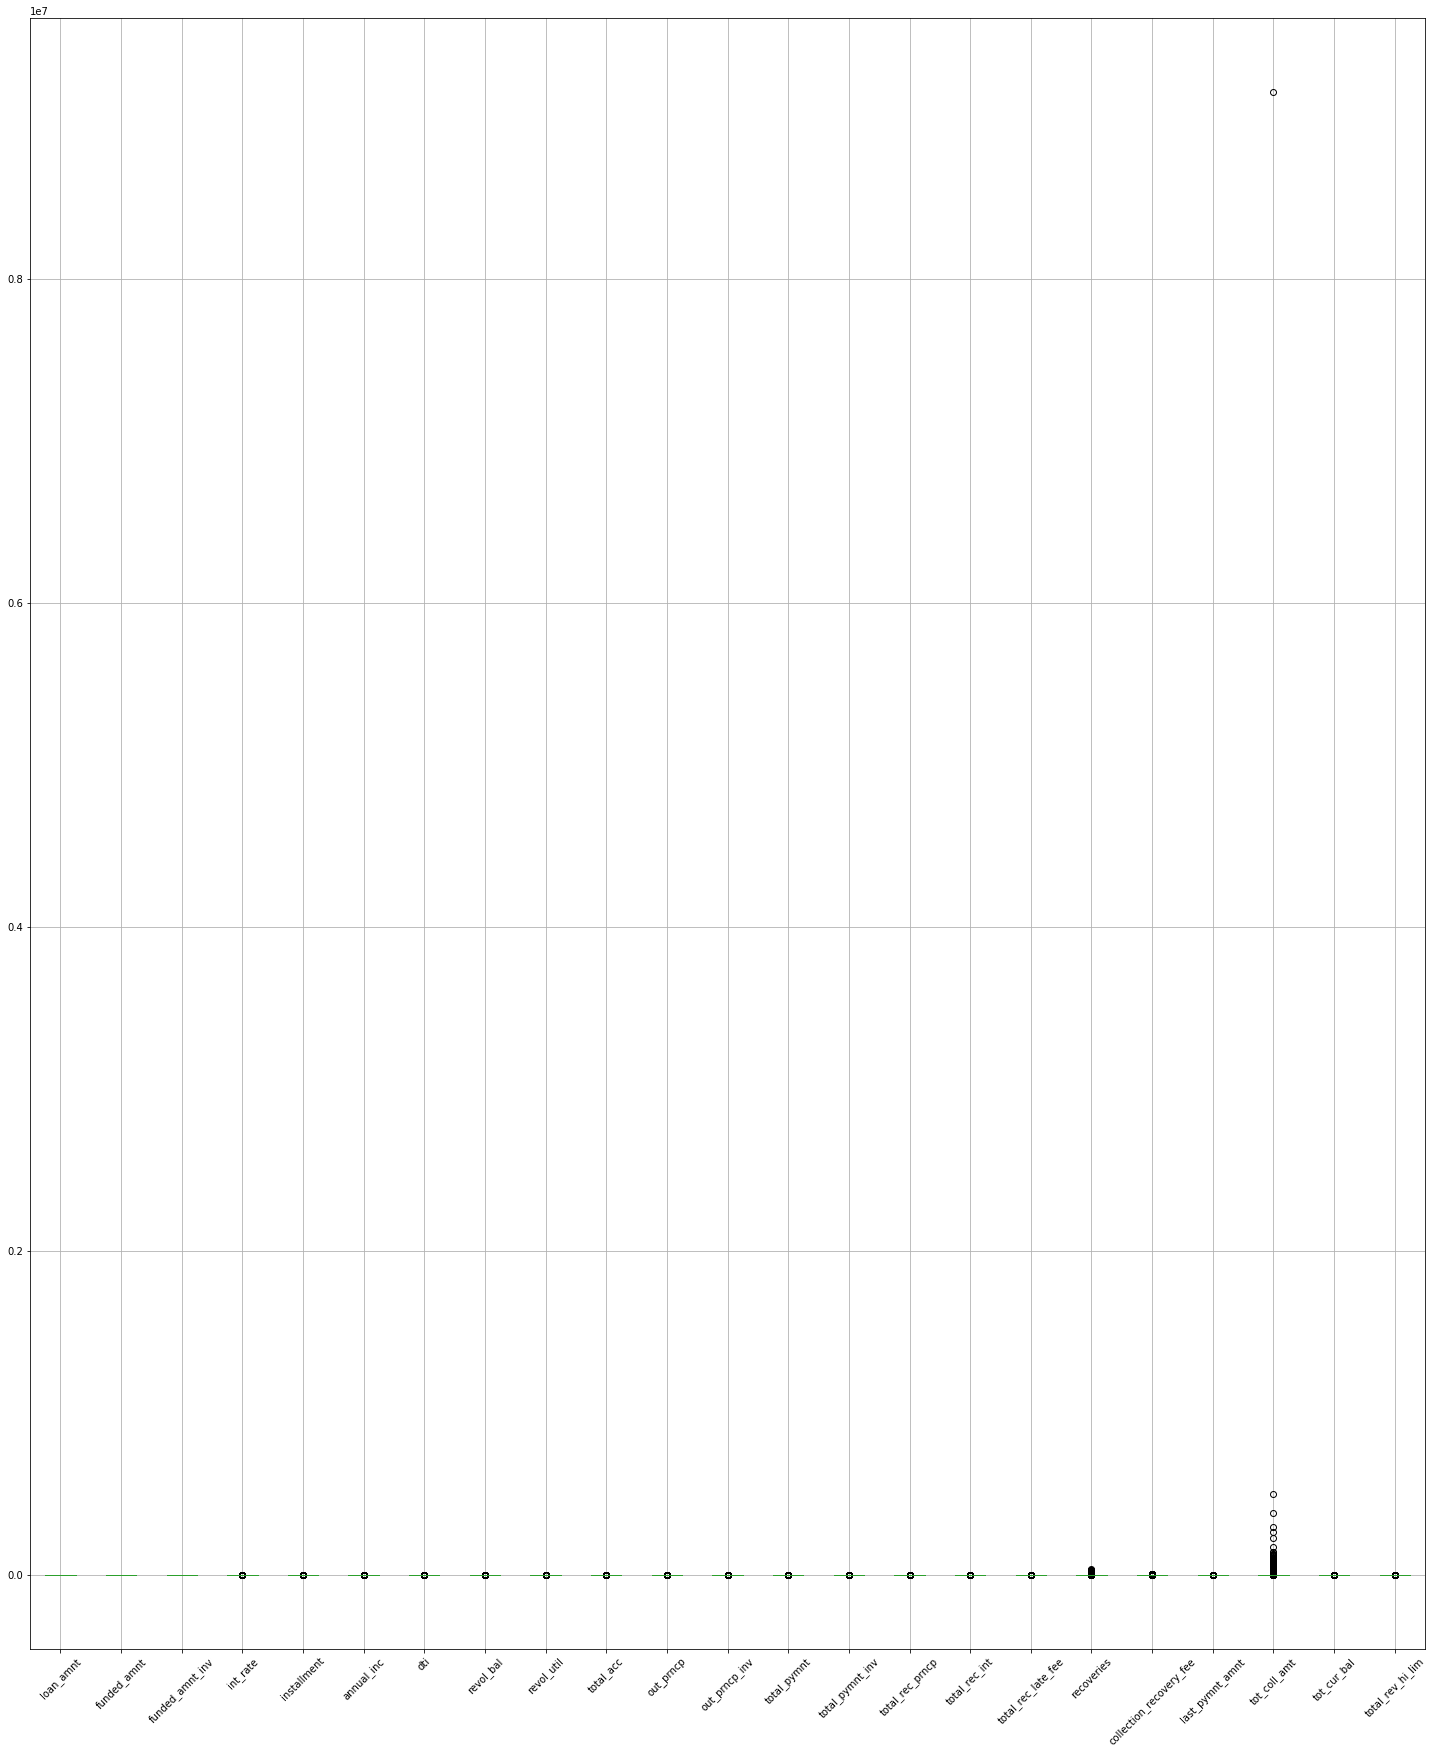

In [57]:
scaled_df_num.boxplot(figsize=(25,30), rot=45)

## Correlation and Concatenation

## Correlation

In [58]:
scaled_df_num.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_bal,revol_util,total_acc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,1.000000,0.999265,0.997601,0.142966,0.944870,0.335209,0.020189,0.337489,0.119591,0.222084,...,0.480328,0.395880,0.537586,0.025966,0.075513,0.055135,0.233596,-0.004107,0.316383,0.299986
funded_amnt,0.999265,1.000000,0.998485,0.143116,0.945903,0.335002,0.020583,0.337405,0.120104,0.222039,...,0.479172,0.394669,0.536533,0.025579,0.075076,0.054898,0.233134,-0.004109,0.316602,0.300194
funded_amnt_inv,0.997601,0.998485,1.000000,0.143374,0.944149,0.334356,0.021489,0.336870,0.120886,0.222258,...,0.478589,0.391010,0.534517,0.023091,0.073737,0.053082,0.232029,-0.004104,0.316262,0.299884
int_rate,0.142966,0.143116,0.143374,1.000000,0.130468,-0.073825,0.078454,-0.035344,0.271604,-0.039482,...,0.174453,0.059298,0.446517,0.050743,0.110848,0.074360,0.107346,0.001089,-0.088206,-0.159695
installment,0.944870,0.945903,0.944149,0.130468,1.000000,0.328578,0.013909,0.320017,0.131877,0.199872,...,0.521332,0.455444,0.502038,0.035728,0.076931,0.057180,0.243246,-0.003400,0.286575,0.275535
annual_inc,0.335209,0.335002,0.334356,-0.073825,0.328578,1.000000,-0.086821,0.298569,0.036737,0.188651,...,0.163275,0.152245,0.130367,0.009864,0.007613,0.006805,0.092662,0.000974,0.409668,0.262754
dti,0.020189,0.020583,0.021489,0.078454,0.013909,-0.086821,1.000000,0.067119,0.086642,0.106266,...,-0.039563,-0.050855,0.008750,-0.006245,0.001719,0.002923,-0.028601,-0.001979,-0.007072,0.032157
revol_bal,0.337489,0.337405,0.336870,-0.035344,0.320017,0.298569,0.067119,1.000000,0.217618,0.189322,...,0.139355,0.120577,0.139872,-0.000166,0.010861,0.008588,0.060027,-0.006004,0.434876,0.805639
revol_util,0.119591,0.120104,0.120886,0.271604,0.131877,0.036737,0.086642,0.217618,1.000000,-0.114583,...,0.082158,0.036746,0.183708,0.019436,0.029593,0.019874,-0.000939,-0.008754,0.076203,-0.111341
total_acc,0.222084,0.222039,0.222258,-0.039482,0.199872,0.188651,0.106266,0.189322,-0.114583,1.000000,...,0.110983,0.101289,0.091824,-0.005655,0.009670,0.011048,0.087729,0.006215,0.299308,0.245578


Text(0.5, 1.0, 'Correlation between features')

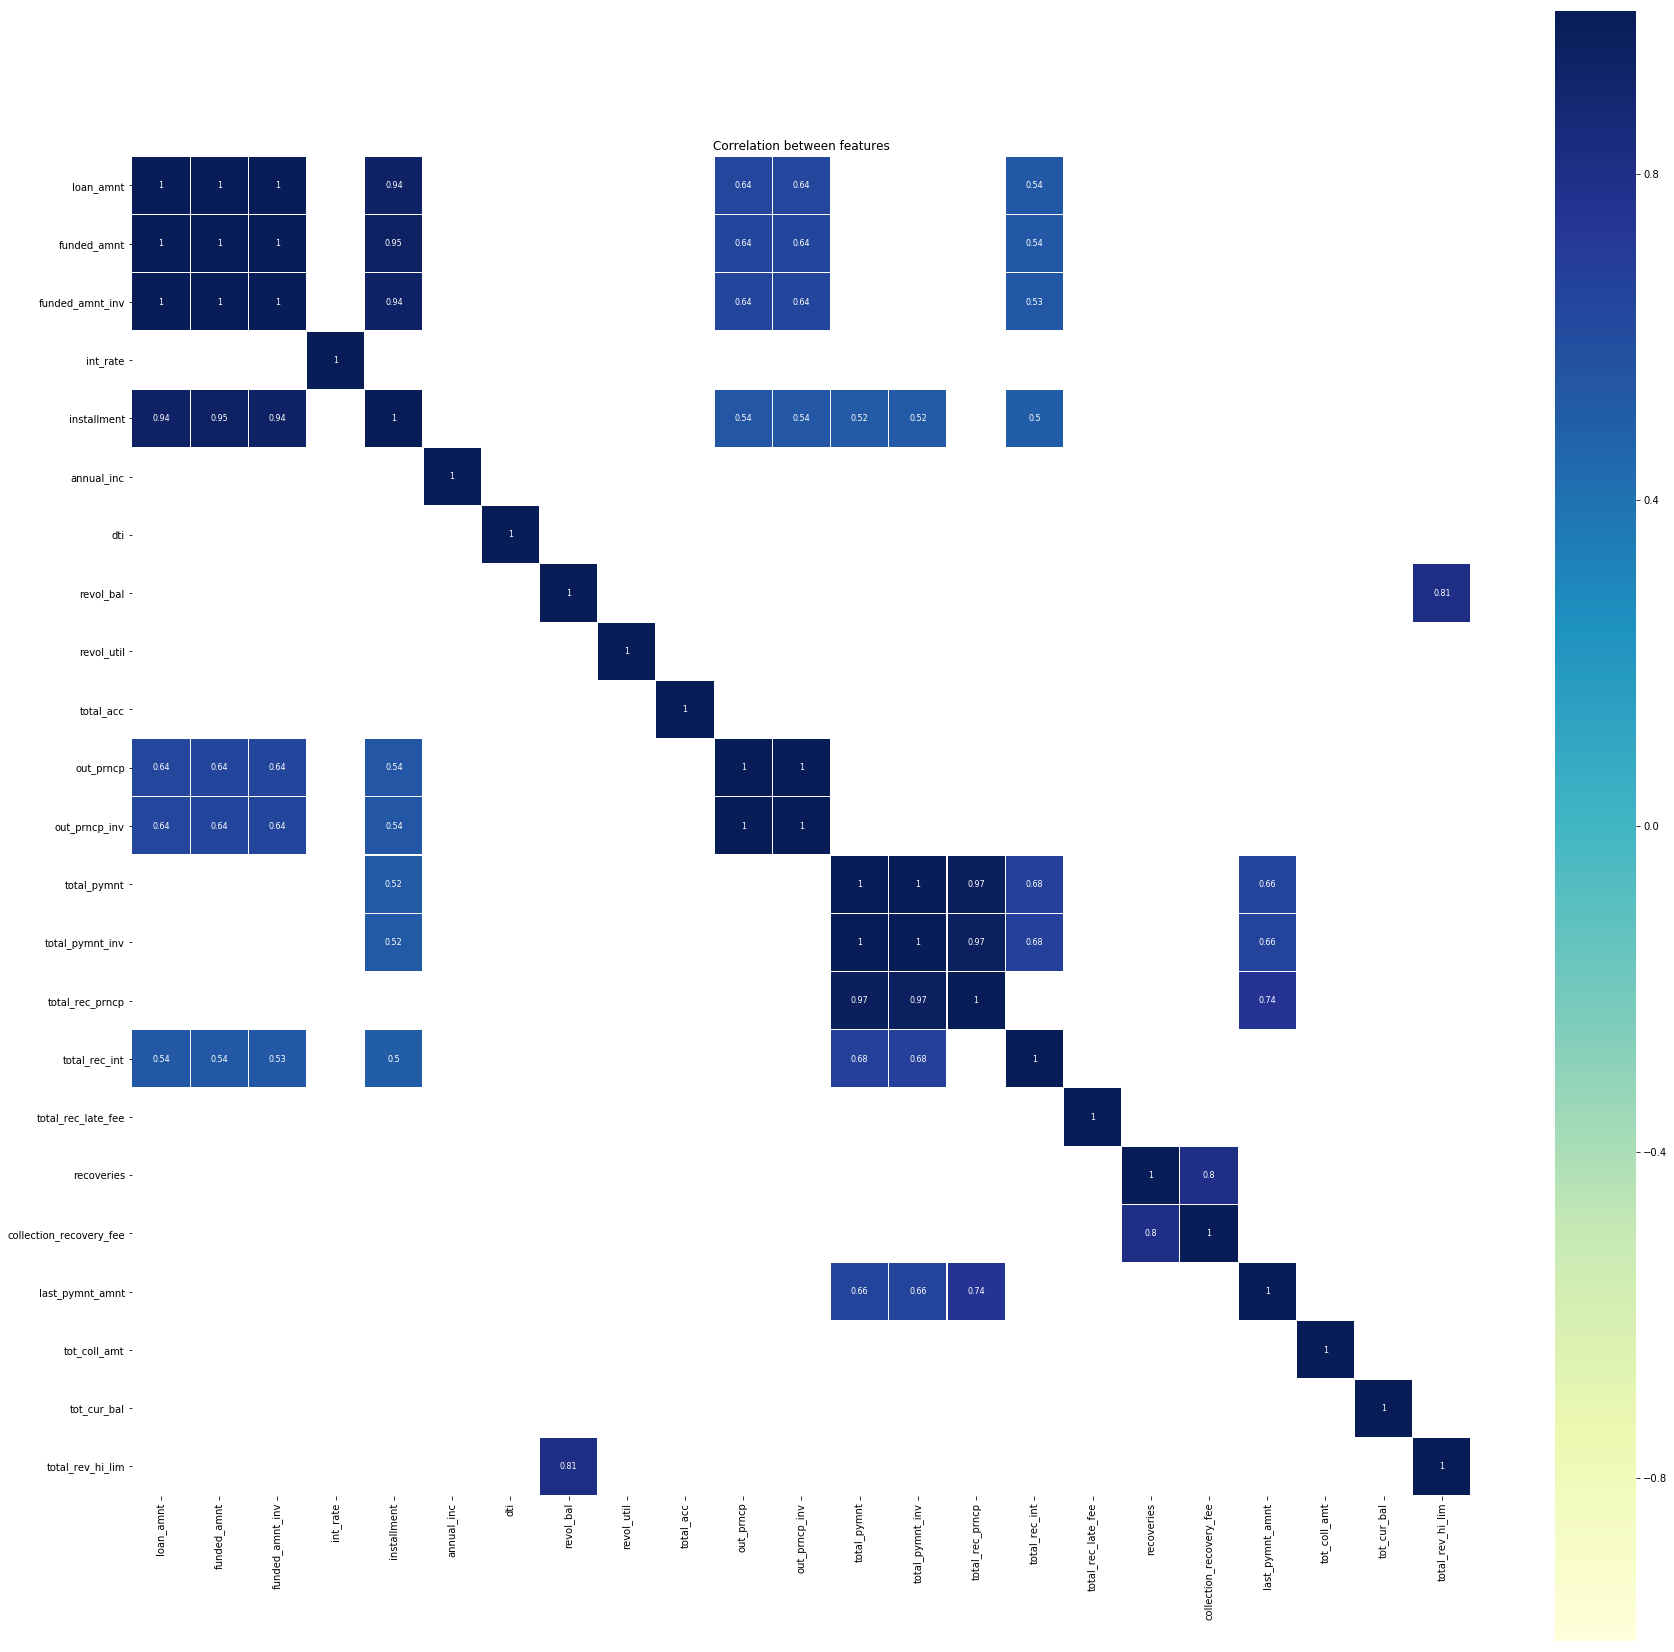

In [59]:
corr=scaled_df_num.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')


In [60]:
## we see multicollinarity between some variables
scaled_df_num = scaled_df_num.drop(["funded_amnt"], axis =1) 
scaled_df_num = scaled_df_num.drop(["funded_amnt_inv"], axis =1) 
scaled_df_num = scaled_df_num.drop(["out_prncp_inv"], axis =1) 
sacled_df_num = scaled_df_num.drop(["total_pymnt_inv"], axis =1)


Text(0.5, 1.0, 'Correlation between features')

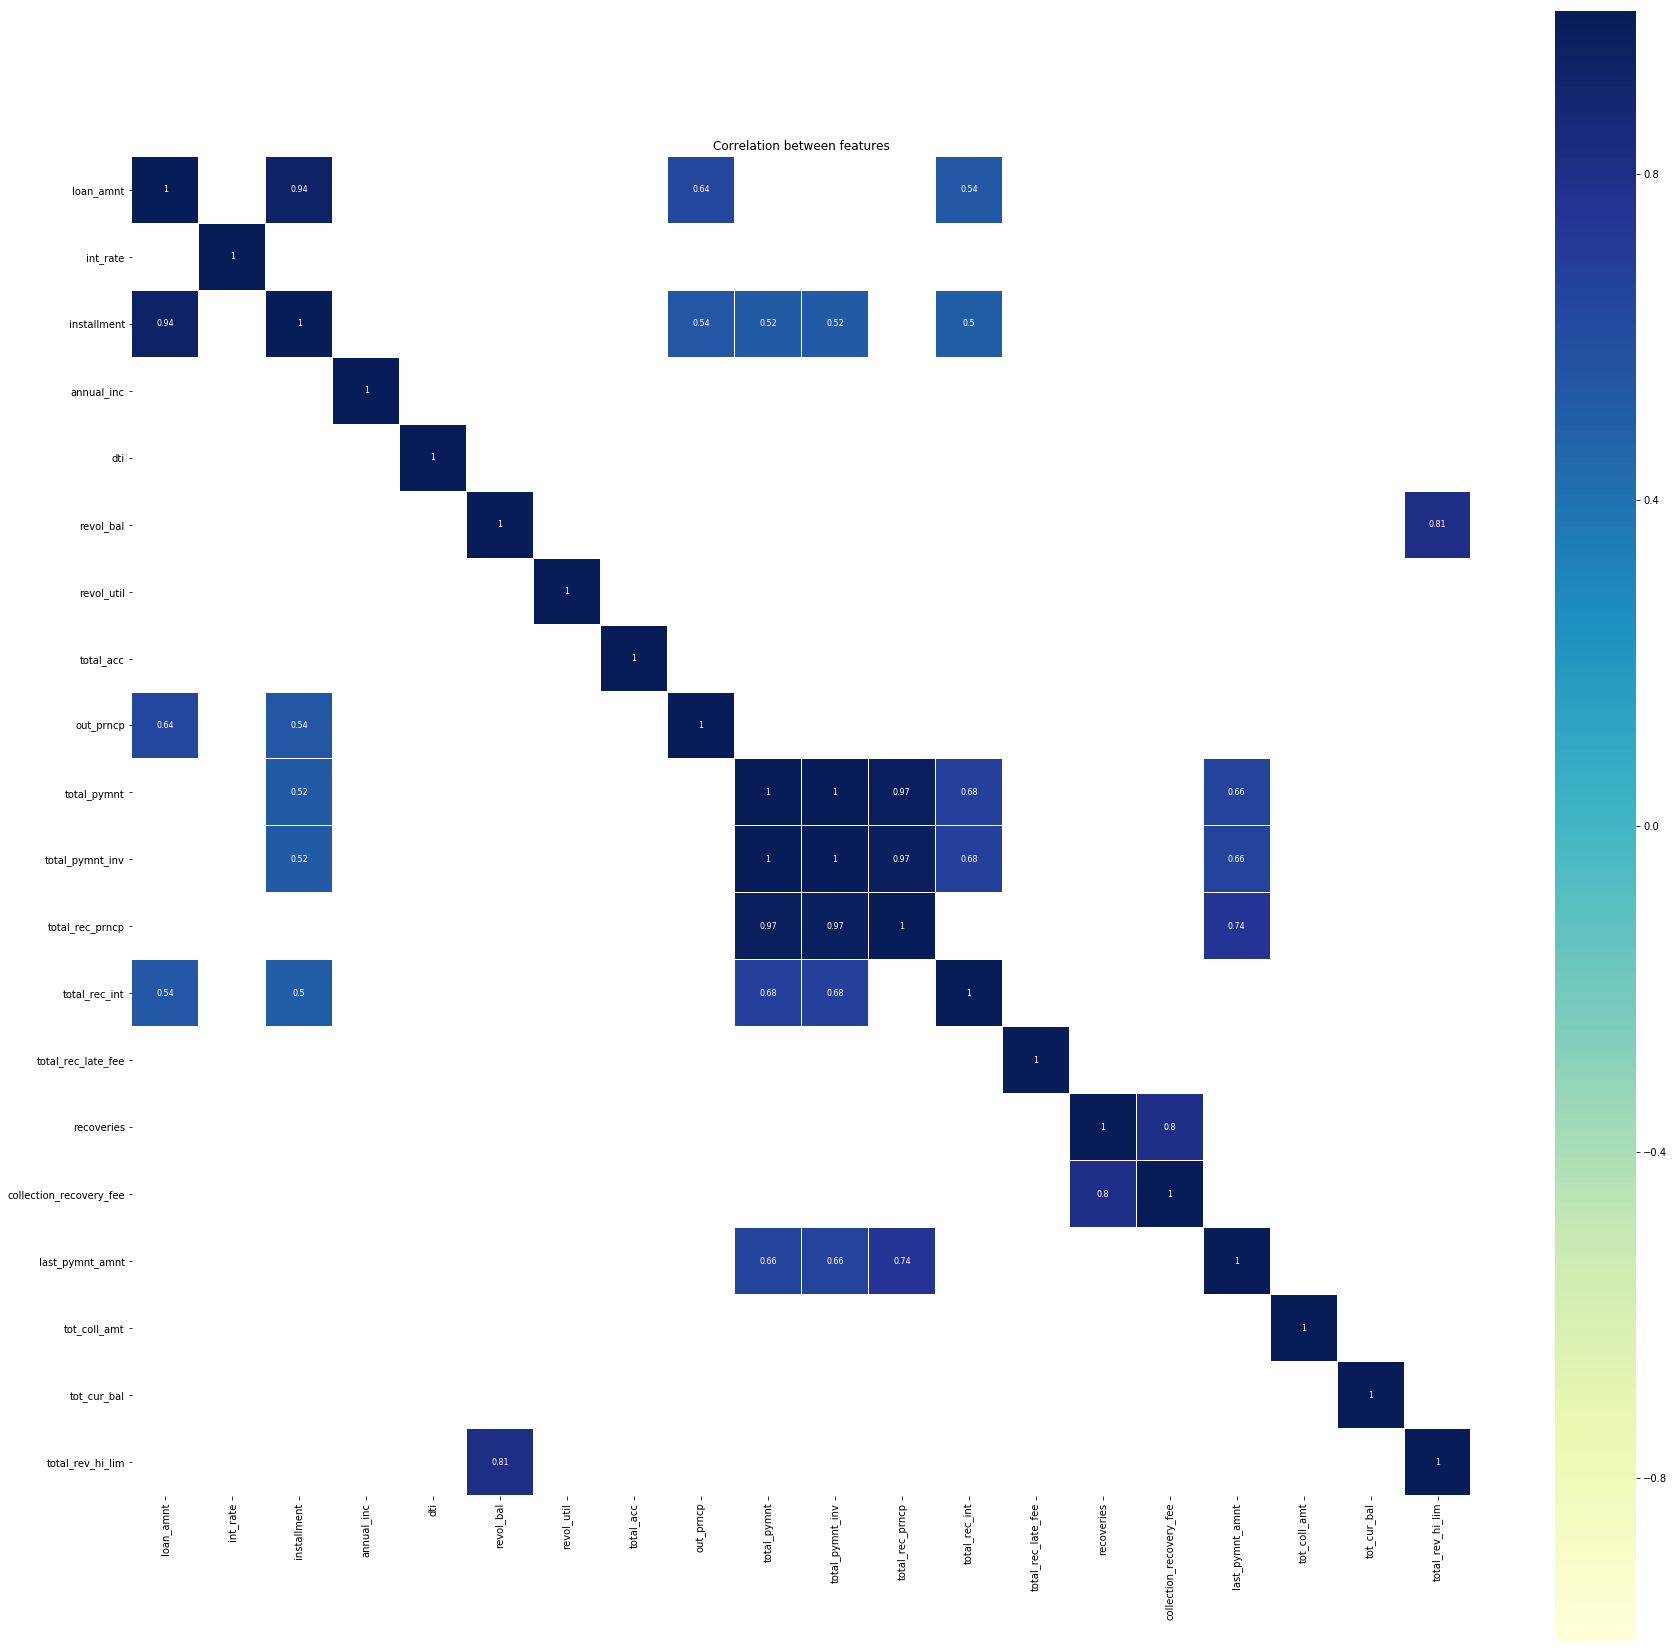

In [61]:
corr=scaled_df_num.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')

## Concatenation

In [62]:
# using concat function we merging two dataframe for furthere analysis
newdata = pd.concat([scaled_df_num, data_cat_dummies], axis=1)
newdata.head()

,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,...,collections_12_mths_ex_med_16.0,collections_12_mths_ex_med_20.0,application_type_JOINT,acc_now_delinq_1.0,acc_now_delinq_2.0,acc_now_delinq_3.0,acc_now_delinq_4.0,acc_now_delinq_5.0,acc_now_delinq_6.0,acc_now_delinq_14.0
0,-0.666667,-0.390000,-0.706344,-0.911111,0.835275,0.121282,0.774373,-1.000000,-0.464953,0.100843,...,0,0,0,0,0,0,0,0,0,0
1,-0.875000,0.380000,-1.037652,-0.777778,-1.381864,-0.710036,-1.295265,-1.333333,-0.464953,-0.452125,...,0,0,0,0,0,0,0,0,0,0
2,-0.883333,0.495000,-0.958876,-1.172178,-0.739601,-0.621838,1.186630,-0.933333,-0.464953,-0.224784,...,0,0,0,0,0,0,0,0,0,0
3,-0.250000,0.083333,-0.139031,-0.351111,0.198835,-0.438212,-0.972145,0.866667,-0.464953,0.826216,...,0,0,0,0,0,0,0,0,0,0
4,-0.833333,-0.050000,-1.012057,0.333333,0.027454,1.103698,-0.055710,0.933333,-0.408266,-0.197603,...,0,0,0,0,0,0,0,0,0,0


In [63]:
issue_d = pd.DataFrame(df['issue_d'])

In [64]:
newdata = pd.concat([newdata, issue_d], axis=1)

In [65]:
DV = pd.DataFrame(df['default_ind'])
DV

,default_ind
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [66]:
newdata = pd.concat([newdata, DV], axis=1)

In [67]:
newdata.shape

(855969, 223)

## Splitting on the basis of Date

In [68]:
mask1 = (newdata['issue_d'] > '2007-06-01') & (newdata['issue_d'] <= '2015-05-01')
mask2 = (newdata['issue_d'] > '2015-06-01') & (newdata['issue_d'] <= '2015-12-01')

In [69]:
print(newdata.loc[mask1])

        loan_amnt  int_rate  installment  annual_inc       dti  revol_bal  \
0       -0.666667 -0.390000    -0.706344   -0.911111  0.835275   0.121282   
1       -0.875000  0.380000    -1.037652   -0.777778 -1.381864  -0.710036   
2       -0.883333  0.495000    -0.958876   -1.172178 -0.739601  -0.621838   
3       -0.250000  0.083333    -0.139031   -0.351111  0.198835  -0.438212   
4       -0.833333 -0.050000    -1.012057    0.333333  0.027454   1.103698   
5       -0.666667 -0.848333    -0.726954   -0.644444 -0.533278  -0.273839   
6       -0.500000  0.495000    -0.683161   -0.399911  0.490849   0.404712   
7       -0.833333  0.941667    -0.878171   -0.377778 -1.019967  -0.255908   
8       -0.616667  1.381667    -0.740041   -0.555556 -1.003328  -0.465179   
9       -0.635417 -0.050000    -0.839523   -1.111111  0.039101  -0.182374   
10      -0.541667  0.276667    -0.736632    0.155556 -0.123960  -0.547053   
11      -0.083333 -0.050000     0.064274    0.222222 -0.568220   0.794621   

In [70]:
print(newdata.loc[mask2])

        loan_amnt  int_rate  installment  annual_inc       dti  revol_bal  \
452272   1.000000 -1.278333     1.190701    1.888889 -0.671381   0.516820   
452273   0.416667  1.081667     0.286647    1.888889 -0.683860   0.149361   
452274  -0.500000 -0.916667    -0.529983   -0.133333 -0.378536  -0.099805   
452275   0.583333  0.830000     1.093856    2.555556  0.623128   3.282110   
452276   0.166667 -1.000000     0.258963    0.622222 -0.228785   0.209272   
452277   0.250000  0.310000    -0.010160    0.333333  0.164725  -0.054907   
452278  -0.583333 -0.531667    -0.609305    0.447556 -0.265391  -0.048165   
452279   1.833333 -0.750000     2.321983    0.555556 -0.353577   0.246386   
452280   0.166667  0.166667     0.418154   -0.377778  1.138103  -0.615721   
452281   1.750000 -0.368333     2.337642    0.255489 -0.356905   1.597373   
452282  -0.416667 -0.750000    -0.418122   -0.377778 -0.204659  -0.287670   
452283  -0.500000  0.600000    -0.432140   -0.775556  0.671381   0.122324   

In [71]:
X_train = newdata[mask1].iloc[:, 1:222]

In [72]:
y_train = newdata['default_ind'].loc[mask1]

In [73]:
X_train.shape

(598977, 221)

In [74]:
y_train.value_counts()

0    552821
1     46156
Name: default_ind, dtype: int64

In [75]:
X_train

,int_rate,installment,annual_inc,dti,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_pymnt_inv,...,collections_12_mths_ex_med_20.0,application_type_JOINT,acc_now_delinq_1.0,acc_now_delinq_2.0,acc_now_delinq_3.0,acc_now_delinq_4.0,acc_now_delinq_5.0,acc_now_delinq_6.0,acc_now_delinq_14.0,issue_d
0,-0.390000,-0.706344,-0.911111,0.835275,0.121282,0.774373,-1.000000,-0.464953,0.100843,0.101123,...,0,0,0,0,0,0,0,0,0,2011-12-01
1,0.380000,-1.037652,-0.777778,-1.381864,-0.710036,-1.295265,-1.333333,-0.464953,-0.452125,-0.450892,...,0,0,0,0,0,0,0,0,0,2011-12-01
2,0.495000,-0.958876,-1.172178,-0.739601,-0.621838,1.186630,-0.933333,-0.464953,-0.224784,-0.222565,...,0,0,0,0,0,0,0,0,0,2011-12-01
3,0.083333,-0.139031,-0.351111,0.198835,-0.438212,-0.972145,0.866667,-0.464953,0.826216,0.832995,...,0,0,0,0,0,0,0,0,0,2011-12-01
4,-0.050000,-1.012057,0.333333,0.027454,1.103698,-0.055710,0.933333,-0.408266,-0.197603,-0.195266,...,0,0,0,0,0,0,0,0,0,2011-12-01
5,-0.848333,-0.726954,-0.644444,-0.533278,-0.273839,-0.768802,-0.800000,-0.464953,0.074668,0.078186,...,0,0,0,0,0,0,0,0,0,2011-12-01
6,0.495000,-0.683161,-0.399911,0.490849,0.404712,0.827298,-0.866667,-0.325313,0.360187,0.364944,...,0,0,0,0,0,0,0,0,0,2011-12-01
7,0.941667,-0.878171,-0.377778,-1.019967,-0.255908,0.880223,-1.333333,-0.464953,-0.118291,-0.115610,...,0,0,0,0,0,0,0,0,0,2011-12-01
8,1.381667,-0.740041,-0.555556,-1.003328,-0.465179,-0.649025,-0.733333,-0.464953,-0.493457,-0.492403,...,0,0,0,0,0,0,0,0,0,2011-12-01
9,-0.050000,-0.839523,-1.111111,0.039101,-0.182374,-0.540390,-1.400000,-0.464953,-0.398852,-0.398172,...,0,0,0,0,0,0,0,0,0,2011-12-01


In [76]:
X_train.drop(['issue_d'], axis=1, inplace=True)

In [77]:
y_test = newdata['default_ind'].loc[mask2]

In [78]:
X_test = newdata[mask2].iloc[:, 1:222]

In [79]:
y_test.value_counts()

0    229244
1       160
Name: default_ind, dtype: int64

In [80]:
X_test.drop(['issue_d'], axis=1, inplace=True)

## Handling Imbalance data with Smote

In [81]:

!pip install imblearn 
from imblearn.over_sampling import SMOTE

In [82]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=2)

X_train, y_train = smo.fit_sample(X_train, y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train.shape))

After OverSampling, the shape of X_train: (1105642, 220)
After OverSampling, the shape of y_train: (1105642,) 



In [83]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=2)

X_test, y_test = smo.fit_sample(X_test, y_test)

print('After OverSampling, the shape of X_test: {}'.format(X_test.shape))
print('After OverSampling, the shape of y_test: {} \n'.format(y_test.shape))


After OverSampling, the shape of X_test: (458488, 220)
After OverSampling, the shape of y_test: (458488,) 



In [84]:
y_train

array(['0', '1', '0', ..., '1', '1', '1'], dtype=object)

## Logistic Regression

In [85]:
# Initialize the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)

#Train the model
logreg.fit(X_train,y_train)
logreg

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
y_train =y_train.astype(int)

In [87]:
import statsmodels.api as sm

# instantiate the model (using the default parameters)
logit_model = sm.Logit(X_train, y_train)

# fit the model with data
result = logit_model.fit()

print(result.summary())

ValueError: endog must be in the unit interval.

In [88]:
y_pred = logreg.predict(X_test)

In [89]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [90]:
cm

array([[229100,    144],
       [ 37171, 192073]], dtype=int64)

In [91]:
#Printing the Report of the model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92    229244
           1       1.00      0.84      0.91    229244

   micro avg       0.92      0.92      0.92    458488
   macro avg       0.93      0.92      0.92    458488
weighted avg       0.93      0.92      0.92    458488



In [92]:
## Accuracy
229100/(229100+37171)

0.8604016209050178

## Random Forest

In [93]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [94]:
# Initialize the model
RF_model = RandomForestClassifier(n_estimators=25,  # Number of trees
                                  max_features=5,   # Num features considered
                                  oob_score=True)   # Use OOB scoring*

In [95]:
# Train the model
RF_model.fit(X=X_train, y= y_train)

# Print the Accuracy
print("OOB accuracy: ")
print(RF_model.oob_score_)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


OOB accuracy: 
0.9917441631197078


## SVM

In [97]:
# Initialize the model
from sklearn import svm
SVM_model = svm.LinearSVC()

In [98]:
y_train =y_train.astype(int)

In [99]:
y_train.dtype

dtype('int32')

In [100]:
# Train the model
SVM_model.fit(X_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [101]:
# Predicting the Test set results
y_pred = SVM_model.predict(X_test)

In [102]:
y_test=y_test.astype(int)

In [103]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
CM1 = confusion_matrix(y_test,y_pred)
print(CM1)

[[212721  16523]
 [ 29531 199713]]


In [104]:
#Printing the Report of the model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90    229244
           1       0.92      0.87      0.90    229244

   micro avg       0.90      0.90      0.90    458488
   macro avg       0.90      0.90      0.90    458488
weighted avg       0.90      0.90      0.90    458488



In [105]:
# Precision
212721/(212721+29531)*100

87.80980136386903

## KNN

In [106]:
# Initialize the Model
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 50)

In [107]:
#Train the model
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

In [ ]:
# Predicting the Test set results
y_pred = KNN_model.predict(X_test)

In [146]:
# Making the Confusion Matrix
CM2 = confusion_matrix(y_test,y_pred)
print(CM2)

[[11124  1980]
 [   28   132]]


In [147]:
#Printing the Report of the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     13104
           1       0.06      0.82      0.12       160

   micro avg       0.85      0.85      0.85     13264
   macro avg       0.53      0.84      0.52     13264
weighted avg       0.99      0.85      0.91     13264



In [152]:
#Precisiom
11124/(11124+1980)*100

84.89010989010988

## Naive Bayes

In [ ]:
# Initialize the Model
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()


In [ ]:
#Train the model
NB_model.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = NB_model.predict(X_test)

In [ ]:
# Making the Confusion Matrix
CM3 = confusion_matrix(y_test,y_pred)
print(CM3)

In [157]:
#Printing the Report of the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13104
           1       0.75      0.02      0.04       160

   micro avg       0.99      0.99      0.99     13264
   macro avg       0.87      0.51      0.52     13264
weighted avg       0.99      0.99      0.98     13264



In [96]:
#Precision
13103/(13103+57)*100

99.56686930091185